In [89]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_combat = pd.read_csv('./train_combat.csv')
train_label = pd.read_csv('./train_label.csv')

In [45]:
train_combat

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,62835,129987,am,2,17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,62835,74659,am,4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,62835,179366,am,1,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,62835,157318,am,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,62835,394244,am,5,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
train_combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574671 entries, 0 to 1574670
Data columns (total 13 columns):
day                    1574671 non-null int64
acc_id                 1574671 non-null int64
char_id                1574671 non-null int64
server                 1574671 non-null object
class                  1574671 non-null int64
level                  1574671 non-null int64
pledge_cnt             1574671 non-null float64
random_attacker_cnt    1574671 non-null float64
random_defender_cnt    1574671 non-null float64
temp_cnt               1574671 non-null float64
same_pledge_cnt        1574671 non-null float64
etc_cnt                1574671 non-null float64
num_opponent           1574671 non-null float64
dtypes: float64(7), int64(5), object(1)
memory usage: 156.2+ MB


In [5]:
train_combat.describe().T
# level: 생각보다 전체적으로 레벨이 높은 편 = 오랫동안 활동한 유저가 많다는 뜻
# pledge_cnt~num_opponent : 매우 양극화된 형태의 분포를 가짐

# 결론: sparse data 꼴임

,count,mean,std,min,25%,50%,75%,max
day,1574671.0,14.765611,8.129315,1.0,8.0,15.0,22.000000,28.000000
acc_id,1574671.0,65443.755440,37490.762788,2.0,33076.0,65577.0,97666.000000,130473.000000
char_id,1574671.0,198516.437573,114658.997867,2.0,99008.0,198262.0,297801.000000,397443.000000
class,1574671.0,3.098323,2.152838,0.0,1.0,3.0,4.000000,7.000000
level,1574671.0,12.219954,5.295066,0.0,11.0,14.0,16.000000,17.000000
pledge_cnt,1574671.0,0.147561,1.066027,0.0,0.0,0.0,0.000000,56.225397
random_attacker_cnt,1574671.0,0.039759,0.816501,0.0,0.0,0.0,0.000000,202.154773
random_defender_cnt,1574671.0,0.113596,0.857817,0.0,0.0,0.0,0.000000,112.391126
temp_cnt,1574671.0,0.067850,0.980107,0.0,0.0,0.0,0.000000,260.492176
same_pledge_cnt,1574671.0,0.061674,1.021016,0.0,0.0,0.0,0.000000,235.567178


In [37]:
print(train_combat['level'].value_counts())

16    405528
17    247160
11    140518
15    129284
14    128688
0      80755
2      75615
13     73642
12     70584
10     43040
6      40015
1      37198
5      27955
9      23113
3      18651
4      13691
7      10004
8       9230
Name: level, dtype: int64


In [38]:
train_combat['pledge_cnt'].value_counts()

0.000000     1451015
0.064184       20271
0.128368       11288
0.192553        7644
0.256737        5807
0.320921        4661
0.385105        3981
0.449290        3421
0.513474        3009
0.577658        2670
0.641842        2643
0.706027        2346
0.770211        2059
0.834395        1939
0.898579        1824
0.962764        1595
1.026948        1504
1.091132        1451
1.219501        1296
1.155316        1257
1.283685        1188
1.347869        1096
1.412053        1059
1.476238        1049
1.604606        1020
1.540422         957
1.668790         935
1.732975         865
1.797159         859
1.861343         804
              ...   
39.088204          1
38.125440          1
40.628626          1
39.794230          1
37.932887          1
26.443908          1
40.307704          1
42.682521          1
35.237149          1
37.226861          1
32.348858          1
26.122987          1
31.129358          1
30.102410          1
34.466938          1
27.791777          1
36.071544    

In [39]:
train_combat['random_attacker_cnt'].value_counts()

0.000000      1567216
3.416700          463
3.701425          412
3.986150          402
3.131975          385
4.270875          351
4.840326          335
4.555601          333
2.847250          311
5.125051          263
5.694501          263
5.409776          252
5.979226          228
6.263951          214
6.548676          194
6.833401          184
7.118126          170
7.402851          153
7.687576          141
8.257026          128
7.972301          117
8.541751          109
9.111201          101
9.680651           86
8.826476           85
9.395926           82
10.534826          71
9.965376           69
10.250101          69
10.819551          65
               ...   
39.292055           1
202.154773          1
64.917307           1
47.833806           1
78.584109           1
65.486758           1
55.236656           1
36.729529           1
65.771483           1
52.104681           1
47.264355           1
46.125455           1
138.091641          1
81.431359           1
69.188183 

In [40]:
train_combat['random_defender_cnt'].value_counts()

0.000000      1497280
1.183064        48050
2.366129        15145
3.549193         6242
4.732258         2963
5.915322         1598
7.098387         1000
8.281451          611
9.464516          421
10.647580         308
11.830645         251
13.013709         168
14.196774         117
16.562903          88
15.379838          87
17.745967          49
18.929032          34
20.112096          28
22.478225          21
21.295161          14
27.210483          14
33.125806          12
24.844354          12
30.759677          12
28.393548          11
23.661290          10
29.576612           8
34.308870           7
39.041128           7
26.027419           6
               ...   
43.773386           2
95.828223           2
37.858064           2
97.011288           2
74.533063           2
89.912901           2
36.674999           2
87.546772           2
70.983869           2
80.448385           2
72.166934           2
68.617740           2
85.180643           1
100.560481          1
56.787095 

In [41]:
train_combat['temp_cnt'].value_counts()

0.000000      1454390
0.479728        82839
0.959456        22176
1.439183         8157
1.918911         3448
2.398639         1244
2.878367          778
3.358094          348
3.837822          249
4.317550          168
4.797278          102
5.277005           86
5.756733           63
6.236461           48
7.195916           32
7.675644           31
6.716189           27
8.635100           26
8.155372           23
9.114828           23
10.554011          22
11.513466          18
9.594555           17
11.993194          12
11.033739          11
13.432377          11
15.831016          10
17.749927          10
13.912105          10
12.952650          10
               ...   
35.499855           1
47.013321           1
39.337677           1
92.107731           1
29.743121           1
69.080798           1
50.851143           1
96.905008           1
71.479437           1
31.662032           1
79.155081           1
55.168693           1
74.837531           1
24.945844           1
75.317259 

In [42]:
train_combat['same_pledge_cnt'].value_counts()

0.000000      1565648
6.199136         5121
12.398273        2718
24.796545         441
18.597409         441
37.194818         115
30.995681          86
43.393954          37
49.593090          36
61.991363          11
86.787908           6
55.792226           5
74.389635           3
117.783589          1
142.580134          1
235.567178          1
Name: same_pledge_cnt, dtype: int64

In [43]:
train_combat['etc_cnt'].value_counts()

0.000000      1277638
0.112612        88677
0.225223        42553
0.337835        23694
0.563058        15098
0.450446        14166
0.675669        13060
0.788281        10827
0.900892         9427
1.013504         8073
1.126115         6748
1.238727         5616
1.351338         4896
1.463950         4271
1.576561         3874
1.689173         3313
1.801784         3004
1.914396         2701
2.027007         2378
2.139619         2208
2.252231         2015
2.364842         1679
2.477454         1613
2.590065         1489
2.702677         1366
2.815288         1275
2.927900         1149
3.040511         1089
3.265734          948
3.153123          939
               ...   
38.513142           1
32.432120           1
45.720280           1
31.418616           1
74.323607           1
82.544249           1
42.904991           1
102.589100          1
71.733542           1
32.094285           1
34.346516           1
40.202315           1
44.143718           1
49.661683           1
93.918013 

In [44]:
train_combat['num_opponent'].value_counts()

0.000000     1138938
0.098129      132432
0.196258       62590
0.294386       39217
0.392515       27932
0.490644       21000
0.588773       16587
0.686901       13659
0.785030       10950
0.883159        9512
0.981288        7947
1.079416        7006
1.177545        6182
1.275674        5382
1.373803        4697
1.471931        4163
1.570060        3858
1.668189        3326
1.766318        3142
1.864446        2901
1.962575        2603
2.060704        2449
2.158833        2273
2.256961        2042
2.355090        1921
2.453219        1750
2.649476        1560
2.551348        1543
2.747605        1389
2.845734        1314
              ...   
50.928824          1
34.246935          1
34.050678          1
22.962129          1
33.069390          1
25.219090          1
31.499330          1
26.102249          1
26.298506          1
42.489751          1
36.602025          1
30.812429          1
30.714300          1
51.713854          1
34.148807          1
37.190798          1
24.728446    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEB9BB8828>,
      dtype=object)

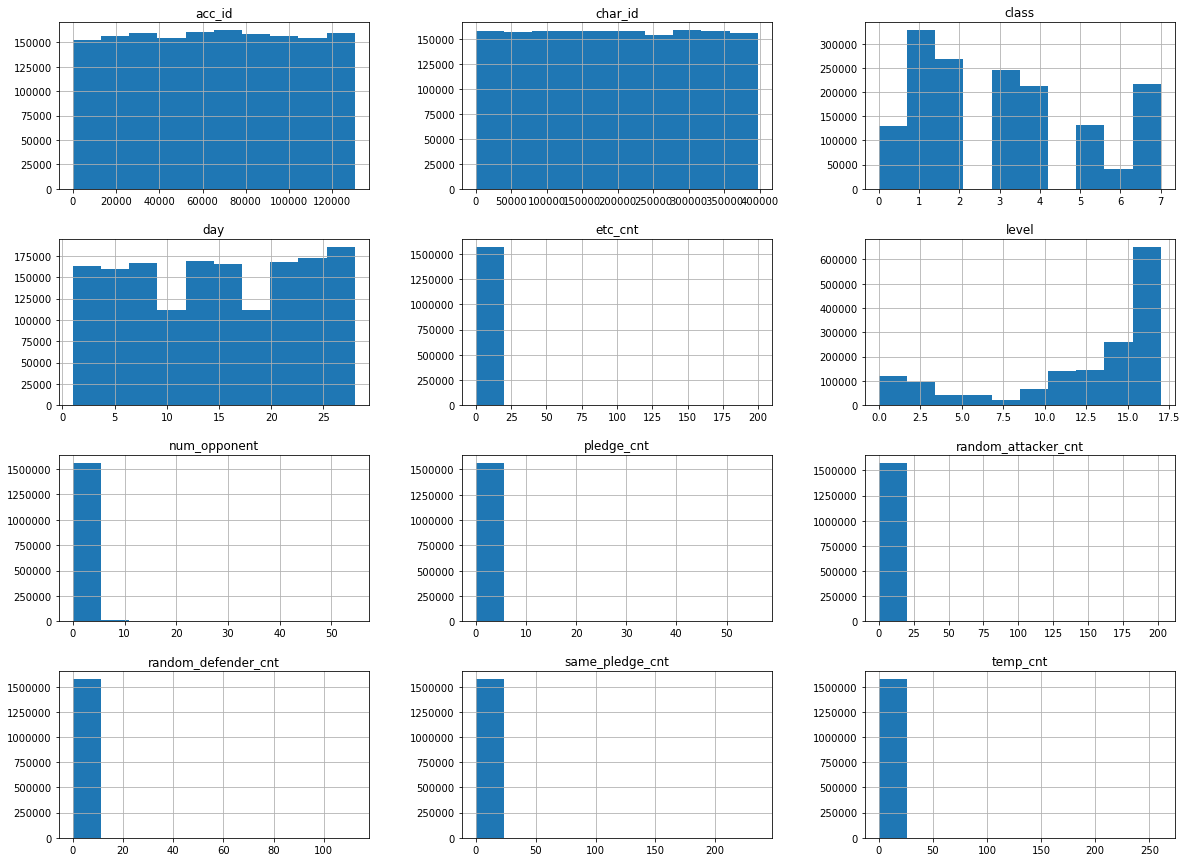

In [7]:
# 특성별 분포 확인
train_combat.hist(figsize=(20,15))

In [9]:
corr_matrix= train_combat.corr()
#corr_matrix['survival_time'].sort_values(ascending=False)
corr_matrix

# pledge_cnt : num_opponent	 상관관계 85%
# 혈맹 간 싸움에서는 아무래도 많은 적과 싸우기 때문으로 보임
# etc_cnt : num_opponent 상관관계 45%

,day,acc_id,char_id,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
day,1.000000,-0.000261,0.001296,0.003640,0.008160,0.004368,0.000181,0.003016,0.002980,-0.026159,-0.002408,0.000427
acc_id,-0.000261,1.000000,-0.002049,-0.002835,-0.003309,-0.000439,0.001797,-0.001280,-0.000167,0.000672,0.002673,0.002151
char_id,0.001296,-0.002049,1.000000,-0.006814,0.003334,-0.003199,0.003306,0.001459,-0.002165,0.000530,0.005881,-0.000752
class,0.003640,-0.002835,-0.006814,1.000000,-0.005440,0.012492,0.003114,0.003799,0.002119,0.004602,0.017178,0.023045
level,0.008160,-0.003309,0.003334,-0.005440,1.000000,0.116130,0.032739,0.085389,0.041260,0.037253,0.112814,0.170594
pledge_cnt,0.004368,-0.000439,-0.003199,0.012492,0.116130,1.000000,0.026830,0.029669,0.006668,0.056612,0.192308,0.853163
random_attacker_cnt,0.000181,0.001797,0.003306,0.003114,0.032739,0.026830,1.000000,-0.006448,-0.003371,0.018152,-0.008527,0.132736
random_defender_cnt,0.003016,-0.001280,0.001459,0.003799,0.085389,0.029669,-0.006448,1.000000,0.010615,0.003205,0.030314,0.049738
temp_cnt,0.002980,-0.000167,-0.002165,0.002119,0.041260,0.006668,-0.003371,0.010615,1.000000,0.003694,-0.004306,0.012463
same_pledge_cnt,-0.026159,0.000672,0.000530,0.004602,0.037253,0.056612,0.018152,0.003205,0.003694,1.000000,0.034748,0.078746


# 가설0: 모든 유저로 예측

In [172]:
# 데이터가 너무 희박하므로 char_id 합쳐서 차원 축소
train_combat_byacc = train_combat.groupby(['day','acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()
train_combat_byacc = train_combat_byacc.drop('char_id',axis=1)
# char_id 개수 컬럼 생성
char_count = train_combat.groupby(['day','acc_id'])['char_id'].count()
char_count = char_count.reset_index()
train_combat_byacc = pd.merge(train_combat_byacc,char_count, on = ['day','acc_id'])
# class는 one hot encoding?
train_combat_byacc = train_combat_byacc.drop('class',axis=1)

# level은 평균 처리 , 나머지 컬럼은 합으로 처리
train_combat_byacc['level'] = train_combat_byacc['level'] / train_combat_byacc['char_id']

# day 합쳐서 차원 축소
train_combat_byacc = train_combat_byacc.groupby(['acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()

# 일평균 레벨
train_combat_byacc['level'] = train_combat_byacc['level'] / 28

# 평균 접속일자
train_combat_byacc['day'] = train_combat_byacc['day'] / 28

# 일평균 접속 캐릭터 수
train_combat_byacc['char_id'] = train_combat_byacc['char_id'] / 28

In [175]:
# 레이블 데이터 추가
train_label = pd.read_csv('./train_label_add.csv')
train_light = pd.merge(train_combat_byacc, train_label, on = 'acc_id')
train_light = train_light.drop('Unnamed: 0', axis=1)

# 이탈자 분류를 위한 샘플링
from sklearn.model_selection import train_test_split
data = train_light.drop(['acc_id','amount_spent', 'random_attacker_cnt','survival_time', 'total_spent'],axis=1)
train_set = data.drop('secession', axis=1)
target = data['secession']
train_x, test_x, train_y, test_y = train_test_split(train_set,target,test_size=0.3, random_state=0 )

In [103]:
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x,train_y)
y_pred = rnd_clf.predict(test_x)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred)) 

# 결과
# RandomForestClassifier 0.71975
# RandomForestClassifier 0.676790004805382

RandomForestClassifier 0.71975
RandomForestClassifier 0.676790004805382


X_train.shape : (28000, 9)
X_train_l1.shape : (28000, 5)
[ True  True False False False False  True  True  True]


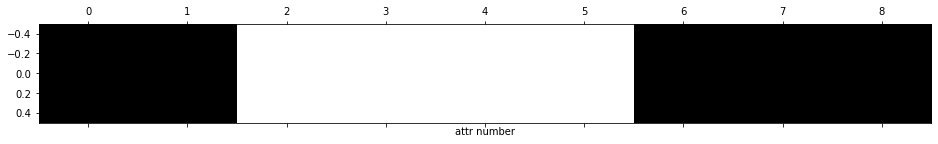

In [177]:
# feature engineering

from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=700, random_state=42), threshold="median")
select.fit(train_x,train_y)

train_x_l1 = select.transform(train_x)
test_x_l1 = select.transform(test_x)

print("X_train.shape : {}".format(train_x.shape))
print("X_train_l1.shape : {}".format(train_x_l1.shape))
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [176]:
train_set

,day,level,pledge_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
0,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,7.785714,4.071429,0.000000,0.000000,0.479728,0.000000,0.000000,0.098129,0.642857
2,14.500000,14.621684,0.128368,1.183064,3.837822,0.000000,0.900892,3.041991,4.750000
3,14.500000,13.857143,0.000000,2.366129,3.358094,12.398273,0.675669,1.373803,1.857143
4,13.821429,16.000000,1.283685,1.183064,0.479728,0.000000,16.441283,10.107262,1.357143
5,13.500000,13.928571,0.000000,0.000000,2.878367,0.000000,0.225223,0.785030,1.000000
6,14.500000,13.964286,0.000000,17.745967,6.236461,0.000000,15.315168,12.167966,1.357143
7,13.892857,13.044643,0.000000,2.366129,8.635100,0.000000,2.252231,3.434506,3.214286
8,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714
9,13.857143,15.214286,0.000000,1.183064,0.959456,0.000000,0.000000,0.294386,1.000000


In [150]:
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x_l1,train_y)
y_pred = rnd_clf.predict(test_x_l1)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))

# 결과
# RandomForestClassifier 0.7503333333333333
# RandomForestClassifier 0.7165026495079485

RandomForestClassifier 0.7503333333333333
RandomForestClassifier 0.7165026495079485


# 가설1: 라이트유저만 갖고 예측하면 예측률이 높을까? (char_id 합침)

In [10]:
train_combat.describe().T

,count,mean,std,min,25%,50%,75%,max
day,1574671.0,14.765611,8.129315,1.0,8.0,15.0,22.000000,28.000000
acc_id,1574671.0,65443.755440,37490.762788,2.0,33076.0,65577.0,97666.000000,130473.000000
char_id,1574671.0,198516.437573,114658.997867,2.0,99008.0,198262.0,297801.000000,397443.000000
class,1574671.0,3.098323,2.152838,0.0,1.0,3.0,4.000000,7.000000
level,1574671.0,12.219954,5.295066,0.0,11.0,14.0,16.000000,17.000000
pledge_cnt,1574671.0,0.147561,1.066027,0.0,0.0,0.0,0.000000,56.225397
random_attacker_cnt,1574671.0,0.039759,0.816501,0.0,0.0,0.0,0.000000,202.154773
random_defender_cnt,1574671.0,0.113596,0.857817,0.0,0.0,0.0,0.000000,112.391126
temp_cnt,1574671.0,0.067850,0.980107,0.0,0.0,0.0,0.000000,260.492176
same_pledge_cnt,1574671.0,0.061674,1.021016,0.0,0.0,0.0,0.000000,235.567178


In [68]:
# 데이터가 너무 희박하므로 char_id 합쳐서 차원 축소
train_combat_byacc = train_combat.groupby(['day','acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()
train_combat_byacc = train_combat_byacc.drop('char_id',axis=1)
# char_id 개수 컬럼 생성
char_count = train_combat.groupby(['day','acc_id'])['char_id'].count()
char_count = char_count.reset_index()
train_combat_byacc = pd.merge(train_combat_byacc,char_count, on = ['day','acc_id'])
# class는 one hot encoding?
train_combat_byacc = train_combat_byacc.drop('class',axis=1)

# level은 평균 처리 , 나머지 컬럼은 합으로 처리
train_combat_byacc['level'] = train_combat_byacc['level'] / train_combat_byacc['char_id']

# day 합쳐서 차원 축소
train_combat_byacc = train_combat_byacc.groupby(['acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()

# 일평균 레벨
train_combat_byacc['level'] = train_combat_byacc['level'] / 28

# 평균 접속일자
train_combat_byacc['day'] = train_combat_byacc['day'] / 28

# 일평균 접속 캐릭터 수
train_combat_byacc['char_id'] = train_combat_byacc['char_id'] / 28

In [69]:
train_combat_byacc

,acc_id,day,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
0,2,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,5,7.785714,4.071429,0.000000,0.000000,0.000000,0.479728,0.000000,0.000000,0.098129,0.642857
2,8,14.500000,14.621684,0.128368,4.270875,1.183064,3.837822,0.000000,0.900892,3.041991,4.750000
3,17,14.500000,13.857143,0.000000,0.000000,2.366129,3.358094,12.398273,0.675669,1.373803,1.857143
4,20,13.821429,16.000000,1.283685,0.000000,1.183064,0.479728,0.000000,16.441283,10.107262,1.357143
5,21,13.500000,13.928571,0.000000,0.000000,0.000000,2.878367,0.000000,0.225223,0.785030,1.000000
6,31,14.500000,13.964286,0.000000,0.000000,17.745967,6.236461,0.000000,15.315168,12.167966,1.357143
7,38,13.892857,13.044643,0.000000,0.000000,2.366129,8.635100,0.000000,2.252231,3.434506,3.214286
8,41,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714
9,43,13.857143,15.214286,0.000000,0.000000,1.183064,0.959456,0.000000,0.000000,0.294386,1.000000


In [70]:
corr_matrix = train_combat_byacc.corr()
corr_matrix

,acc_id,day,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
acc_id,1.000000,-0.005137,-0.000303,0.000237,0.005507,-0.001877,0.000332,0.003727,0.006081,0.004507,0.006244
day,-0.005137,1.000000,0.565715,0.099487,0.047563,0.135581,0.059957,0.086052,0.119093,0.141943,0.445091
level,-0.000303,0.565715,1.000000,0.148544,0.072341,0.208101,0.097160,0.136926,0.166983,0.208438,0.294253
pledge_cnt,0.000237,0.099487,0.148544,1.000000,0.109471,0.085169,0.045064,0.282047,0.333669,0.922289,0.170844
random_attacker_cnt,0.005507,0.047563,0.072341,0.109471,1.000000,0.008463,0.024620,0.081914,0.185171,0.218301,0.087979
random_defender_cnt,-0.001877,0.135581,0.208101,0.085169,0.008463,1.000000,0.063063,0.018048,0.127036,0.112245,0.069107
temp_cnt,0.000332,0.059957,0.097160,0.045064,0.024620,0.063063,1.000000,0.031971,0.050940,0.056493,0.074784
same_pledge_cnt,0.003727,0.086052,0.136926,0.282047,0.081914,0.018048,0.031971,1.000000,0.115705,0.309098,0.125942
etc_cnt,0.006081,0.119093,0.166983,0.333669,0.185171,0.127036,0.050940,0.115705,1.000000,0.508728,0.107044
num_opponent,0.004507,0.141943,0.208438,0.922289,0.218301,0.112245,0.056493,0.309098,0.508728,1.000000,0.210892


In [71]:
train_combat_byacc.describe().T

,count,mean,std,min,25%,50%,75%,max
acc_id,40000.0,65281.105550,37525.623536,2.000000,32792.750000,65359.000000,97685.750000,130473.000000
day,40000.0,12.556888,3.421418,1.000000,12.392857,14.321429,14.500000,14.500000
level,40000.0,10.649411,5.380767,0.000000,6.750000,12.834906,14.879326,17.000000
pledge_cnt,40000.0,5.809011,28.499787,0.000000,0.000000,0.000000,0.192553,637.156977
random_attacker_cnt,40000.0,1.565183,11.710144,0.000000,0.000000,0.000000,0.000000,826.556770
random_defender_cnt,40000.0,4.471925,12.686366,0.000000,0.000000,1.183064,3.549193,311.145960
temp_cnt,40000.0,2.671040,15.435359,0.000000,0.000000,0.959456,2.878367,1438.223837
same_pledge_cnt,40000.0,2.427892,10.061479,0.000000,0.000000,0.000000,0.000000,384.346448
etc_cnt,40000.0,7.853807,25.295996,0.000000,0.000000,0.788281,5.630576,1156.407763
num_opponent,40000.0,10.389689,30.783382,0.000000,0.098129,1.373803,6.967142,535.488613


In [108]:
# 라이트 유저만으로 이뤄진 데이터셋 생성(기준: 하위 75%)
# 75%까지 0인 두 컬럼을 선택
cond = (train_combat_byacc['random_attacker_cnt']<=0) & (train_combat['same_pledge_cnt']<=0)
train_combat_light = train_combat_byacc[cond]


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [109]:
train_combat_light

,acc_id,day,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
0,2,14.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,5,7.785714,4.071429,0.000000,0.0,0.000000,0.479728,0.000000,0.000000,0.098129,0.642857
3,17,14.500000,13.857143,0.000000,0.0,2.366129,3.358094,12.398273,0.675669,1.373803,1.857143
4,20,13.821429,16.000000,1.283685,0.0,1.183064,0.479728,0.000000,16.441283,10.107262,1.357143
5,21,13.500000,13.928571,0.000000,0.0,0.000000,2.878367,0.000000,0.225223,0.785030,1.000000
6,31,14.500000,13.964286,0.000000,0.0,17.745967,6.236461,0.000000,15.315168,12.167966,1.357143
7,38,13.892857,13.044643,0.000000,0.0,2.366129,8.635100,0.000000,2.252231,3.434506,3.214286
8,41,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714
9,43,13.857143,15.214286,0.000000,0.0,1.183064,0.959456,0.000000,0.000000,0.294386,1.000000
10,50,14.107143,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.928571


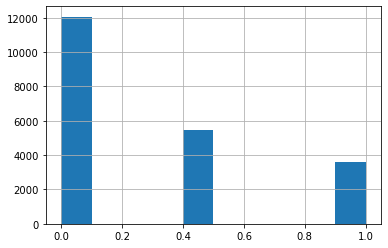

In [116]:
train_combat_light['temp_cnt'].hist(range=(0,1))

In [136]:
# 레이블 데이터 추가
train_label = pd.read_csv('./train_label_add.csv')
train_light = pd.merge(train_combat_light, train_label, on = 'acc_id')
train_light = train_light.drop('Unnamed: 0', axis=1)

In [137]:
train_light

,acc_id,day,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id,survival_time,amount_spent,secession,total_spent
0,2,14.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,64,0.000000,0,0.000000
1,5,7.785714,4.071429,0.000000,0.0,0.000000,0.479728,0.000000,0.000000,0.098129,0.642857,60,0.000000,1,0.000000
2,17,14.500000,13.857143,0.000000,0.0,2.366129,3.358094,12.398273,0.675669,1.373803,1.857143,64,0.070642,0,4.521100
3,20,13.821429,16.000000,1.283685,0.0,1.183064,0.479728,0.000000,16.441283,10.107262,1.357143,64,0.052137,0,3.336752
4,21,13.500000,13.928571,0.000000,0.0,0.000000,2.878367,0.000000,0.225223,0.785030,1.000000,64,0.184267,0,11.793078
5,31,14.500000,13.964286,0.000000,0.0,17.745967,6.236461,0.000000,15.315168,12.167966,1.357143,45,0.051316,1,2.309242
6,38,13.892857,13.044643,0.000000,0.0,2.366129,8.635100,0.000000,2.252231,3.434506,3.214286,64,0.517168,0,33.098736
7,41,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,3,0.000000,1,0.000000
8,43,13.857143,15.214286,0.000000,0.0,1.183064,0.959456,0.000000,0.000000,0.294386,1.000000,64,0.356197,0,22.796592
9,50,14.107143,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.928571,64,0.000000,0,0.000000


In [138]:
corr_matrix = train_light.corr()
corr_matrix
# 상관관계가 조금씩 올랐다
# day와 level이 55%로 매우 높다.
# day가 amount_spent와의  상관관계가 survival_time(-0.108984) 다음으로 가장 높다.
# day: secession(-0.353169)
# etc_cnt: pledge_cnt(0.320071), num_opponent(0.496056)

,acc_id,day,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id,survival_time,amount_spent,secession,total_spent
acc_id,1.000000,-0.005100,-0.000916,-0.003218,NaN,-0.000978,0.000660,-0.003409,0.003004,0.000349,0.007038,-0.002613,0.007062,0.003672,0.002286
day,-0.005100,1.000000,0.553917,0.087875,NaN,0.133745,0.051705,0.076277,0.113007,0.130262,0.447638,0.455888,-0.100462,-0.353169,0.112650
level,-0.000916,0.553917,1.000000,0.134170,NaN,0.210623,0.087976,0.127755,0.164657,0.196747,0.288038,0.157784,-0.024128,-0.072047,0.243874
pledge_cnt,-0.003218,0.087875,0.134170,1.000000,NaN,0.065268,0.038647,0.266063,0.320071,0.919838,0.152632,0.093429,0.020269,-0.095710,0.218188
random_attacker_cnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_defender_cnt,-0.000978,0.133745,0.210623,0.065268,NaN,1.000000,0.058252,0.003565,0.147781,0.104913,0.059812,-0.026666,-0.024085,0.040313,-0.048263
temp_cnt,0.000660,0.051705,0.087976,0.038647,NaN,0.058252,1.000000,0.023718,0.053829,0.047825,0.054588,0.039325,-0.005628,-0.034817,0.019810
same_pledge_cnt,-0.003409,0.076277,0.127755,0.266063,NaN,0.003565,0.023718,1.000000,0.091203,0.289974,0.115096,0.052851,0.009657,-0.037460,0.135034
etc_cnt,0.003004,0.113007,0.164657,0.320071,NaN,0.147781,0.053829,0.091203,1.000000,0.496056,0.082996,0.034694,-0.003685,-0.011122,0.079397
num_opponent,0.000349,0.130262,0.196747,0.919838,NaN,0.104913,0.047825,0.289974,0.496056,1.000000,0.182204,0.093668,0.015922,-0.081878,0.232746


In [131]:
# 이탈자 분류를 위한 샘플링
from sklearn.model_selection import train_test_split
data = train_light.drop(['acc_id','amount_spent', 'survival_time','same_pledge_cnt'],axis=1)
train_set = data.drop('secession', axis=1)
target = data['secession']
train_x, test_x, train_y, test_y = train_test_split(train_set,target,test_size=0.3, random_state=0 )

In [132]:
# 이탈 여부 학습
# num_opponent 제거하면 acc: 0.7188, f1: 0.6847 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x,train_y)
y_pred = rnd_clf.predict(test_x)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))

#결과1(제거 컬럼 없음)
#RandomForestClassifier 0.7199166666666666     4
#RandomForestClassifier 0.6756730676445045     3

# 결과2(random_attacker_cnt만 제거)
# RandomForestClassifier 0.7204152884968762    3
# RandomForestClassifier 0.6861268695203713    1

# 결과3(same_pledge_cnt만 제거)
# RandomForestClassifier 0.7213333333333334    1
# RandomForestClassifier 0.6781520692974015    2

# 결과4(random_attacker_cnt, same_pledge_cnt  제거)
#RandomForestClassifier 0.7205                 2
#RandomForestClassifier 0.6756286266924564     4

RandomForestClassifier 0.7213333333333334
RandomForestClassifier 0.6781520692974015


X_train.shape : (28000, 9)
X_train_l1.shape : (28000, 5)
[ True  True False False False False  True  True  True]


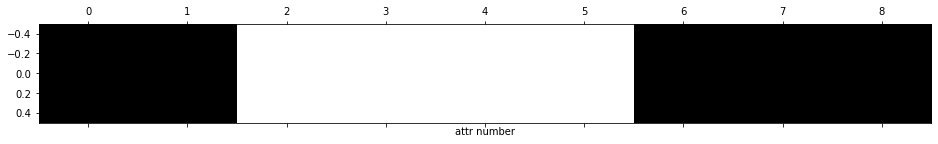

In [139]:
# feature engineering
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=700, random_state=42), threshold="median")
select.fit(train_x,train_y)

train_x_l1 = select.transform(train_x)
print("X_train.shape : {}".format(train_x.shape))
print("X_train_l1.shape : {}".format(train_x_l1.shape))
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [144]:
test_x_l1 = select.transform(test_x)

In [146]:
test_x_l1 = select.transform(test_x)
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x_l1,train_y)
y_pred = rnd_clf.predict(test_x_l1)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))

#결과
# RandomForestClassifier 0.7065833333333333
# RandomForestClassifier 0.6621893888515782

RandomForestClassifier 0.7065833333333333
RandomForestClassifier 0.6621893888515782


### 결론

1) 75% 기준으로 라이트 유저만 분석한 결과, acc는 0.0007%, f1은 0.009% 올랐다. 

2) day가 다른 변수들과 상관관계가 높으므로 flatten하면 큰 변화가 예상된다.

3) 전체 유저를 상대로 feature selection을 하니까 가장 좋은 결과를 얻음, 라이트 유저 상대로는 오히려 떨어짐

# 가설2: sparse data니까 추천 알고리즘을 도입할 수 있을까?

# 가설3-1: day를 flatten 하면 성능이 높아질까? (전체 컬럼)

In [280]:
# 데이터가 너무 희박하므로 char_id 합쳐서 차원 축소
train_combat_byacc = train_combat.groupby(['day','acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()
train_combat_byacc = train_combat_byacc.drop('char_id',axis=1)
#train_combat_byacc = train_combat_byacc.drop('level',axis=1)

In [281]:
# char_id 개수 컬럼 생성
char_count = train_combat.groupby(['day','acc_id'])['char_id'].count()
char_count = char_count.reset_index()
train_combat_byacc = pd.merge(train_combat_byacc,char_count, on = ['day','acc_id'])

In [242]:
# level 새로 생성
level = train_combat.groupby(['day','acc_id'])['level'].mean()
level = level.reset_index()
train_combat_byacc = pd.merge(train_combat_byacc,level, on = ['day','acc_id'])

In [282]:
train_combat_byacc[train_combat_byacc['acc_id']==5]

,day,acc_id,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
254464,9,5,2,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1
422323,14,5,2,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1
626003,20,5,2,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1
694637,22,5,6,20,0.0,0.0,0.0,0.479728,0.0,0.0,0.098129,3
728962,23,5,6,20,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,3
763642,24,5,6,20,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,3
798725,25,5,2,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1
833785,26,5,4,19,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,2
869394,27,5,4,19,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,2
905629,28,5,2,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1


In [135]:
train_combat_byacc.sort_values(['acc_id','day'])

,day,acc_id,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
0,1,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
31215,2,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
62821,3,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
94577,4,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
126142,5,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
157132,6,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
189033,7,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
221513,8,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
254463,9,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
287694,10,2,1,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1


In [268]:
combat_byacc_grouped = train_combat_byacc.groupby('day')
day_flatten = combat_byacc_grouped.get_group(1)
for i in range(2,29):
    day_flatten = pd.merge(day_flatten, combat_byacc_grouped.get_group(i),
                    on = 'acc_id', how='outer',
                    suffixes= ('_' + str(i-1), '_' + str(i)))

In [269]:
day_flatten = day_flatten[[col for col in day_flatten.columns if ('day' not in col) 
               & ('char' not in col)]]
day_flatten.head()

,acc_id,class_1,level_1,pledge_cnt_1,random_attacker_cnt_1,random_defender_cnt_1,temp_cnt_1,same_pledge_cnt_1,etc_cnt_1,num_opponent_1,...,num_opponent_27,class_28,level_28,pledge_cnt_28,random_attacker_cnt_28,random_defender_cnt_28,temp_cnt_28,same_pledge_cnt_28,etc_cnt_28,num_opponent_28
0,2,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,1,0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,8,28.0,100.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,10,46,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,17,1.0,16.0,0.0,0.0,0.0,0.479728,0.0,0.000000,0.098129,...,0.000000,1,16,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,20,4.0,17.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,2.256961,8,34,0.0,0.0,1.183064,0.479728,0.0,0.112612,0.294386
4,31,8.0,17.0,0.0,0.0,0.0,0.000000,0.0,0.112612,0.098129,...,0.098129,1,17,0.0,0.0,0.000000,2.398639,0.0,0.000000,0.392515


In [270]:
# 빈 곳은 0으로 변경
day_flatten = day_flatten.fillna(0)

In [271]:
# 레이블 데이터 추가
train_label = pd.read_csv('./train_label_add.csv')
train = pd.merge(day_flatten, train_label, on = 'acc_id')
train = train.drop('Unnamed: 0', axis=1)

# 이탈자 분류를 위한 샘플링
from sklearn.model_selection import train_test_split
data = train.drop(['acc_id','amount_spent','survival_time','total_spent'],axis=1)
train_set = data.drop('secession', axis=1)
target = data['secession']
train_x, test_x, train_y, test_y = train_test_split(train_set,target,test_size=0.3, random_state=0 )

In [272]:
# 그냥 학습
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x,train_y)
y_pred = rnd_clf.predict(test_x)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))

# 결과 전체
# RandomForestClassifier 0.7418333333333333
# RandomForestClassifier 0.6963935711485693

# 결과: level_mean로 level 바꿈, char_id 추가
# RandomForestClassifier 0.7358333333333333
# RandomForestClassifier 0.6857029545905216

# 결과: char_id 추가
# RandomForestClassifier 0.7418333333333333
# RandomForestClassifier 0.6963935711485693

# 결과: level_mean로 level 바꿈, char_id 추가
# RandomForestClassifier 0.7373333333333333
# RandomForestClassifier 0.6884143930407276

RandomForestClassifier 0.7418333333333333
RandomForestClassifier 0.6963935711485693


X_train.shape : (28000, 252)
X_train_l1.shape : (28000, 126)
[ True  True False False False False False  True  True  True  True False
 False False False False  True  True  True  True False False False False
 False  True  True  True  True False False False False False  True  True
  True  True False False False False False  True  True  True  True False
 False False False False  True  True  True  True False False False False
 False  True  True  True  True False False False  True False  True  True
  True  True False False False False False  True  True  True  True False
 False False False False  True  True  True  True False False False False
 False  True  True  True  True False False False False False  True  True
  True  True False False  True False False  True  True  True  True False
 False False False False  True  True  True  True False False False  True
 False  True  True  True  True False False False False False  True  True
  True  True False False False False False  True  True  True  T

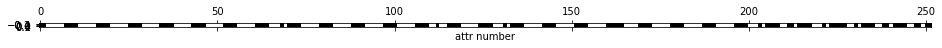

In [216]:
# feature engineering
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=700, random_state=42), threshold="median")
select.fit(train_x,train_y)

train_x_l1 = select.transform(train_x)
print("X_train.shape : {}".format(train_x.shape))
print("X_train_l1.shape : {}".format(train_x_l1.shape))
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [217]:
test_x_l1 = select.transform(test_x)

In [218]:
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x_l1,train_y)
y_pred = rnd_clf.predict(test_x_l1)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))

#결과 전체
# RandomForestClassifier 0.73875
# RandomForestClassifier 0.692315241927569

# 결과: level, char_id 추가
# RandomForestClassifier 0.7356666666666667
# RandomForestClassifier 0.685442284807616

# 결과: char_id 추가
# RandomForestClassifier 0.73875
# RandomForestClassifier 0.692315241927569


RandomForestClassifier 0.73875
RandomForestClassifier 0.692315241927569


# 가설3-2: day를 flatten 하면 성능이 높아질까? (일부 컬럼)

In [ ]:
# 데이터가 너무 희박하므로 char_id 합쳐서 차원 축소
train_combat_byacc = train_combat.groupby(['day','acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()
train_combat_byacc = train_combat_byacc.drop('char_id',axis=1)
# char_id 개수 컬럼 생성
char_count = train_combat.groupby(['day','acc_id'])['char_id'].count()
char_count = char_count.reset_index()
train_combat_byacc = pd.merge(train_combat_byacc,char_count, on = ['day','acc_id'])

In [179]:
train_combat_byacc.columns

Index(['acc_id', 'day', 'level', 'pledge_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'temp_cnt', 'same_pledge_cnt', 'etc_cnt',
       'num_opponent', 'char_id'],
      dtype='object')

In [ ]:
train_combat_byacc = train_combat_byacc.drop(['pledge_cnt','random_attacker_cnt','random_defender_cnt',''])

In [ ]:
combat_byacc_grouped = train_combat_byacc.groupby('day')
day_flatten = combat_byacc_grouped.get_group(1)
for i in range(2,29):
    day_flatten = pd.merge(day_flatten, combat_byacc_grouped.get_group(i),
                    on = 'acc_id', how='outer',
                    suffixes= ('_' + str(i-1), '_' + str(i)))

# 가설4: day, char_id를 flatten 하면 성능이 높아질까

In [ ]:
차원축소법

패키지 다 있음
pca

svd
mf

# class를 더미변수로 변경 

In [278]:
class_dum =pd.get_dummies(train_combat['class'], prefix="C")
combat_dum = pd.concat([train_combat, class_dum], axis=1)
combat_dum = combat_dum.drop('class', axis=1)

In [326]:
# 데이터가 너무 희박하므로 char_id 합쳐서 차원 축소
train_combat_byacc = train_combat.groupby(['day','acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()
train_combat_byacc = train_combat_byacc.drop('char_id',axis=1)
# char_id 개수 컬럼 생성
char_count = train_combat.groupby(['day','acc_id'])['char_id'].count()
char_count = char_count.reset_index()
train_combat_byacc = pd.merge(train_combat_byacc,char_count, on = ['day','acc_id'])
# class는 one hot encoding?
#train_combat_byacc = train_combat_byacc.drop('class',axis=1)

# level은 평균 처리 , 나머지 컬럼은 합으로 처리
train_combat_byacc['level'] = train_combat_byacc['level'] / train_combat_byacc['char_id']

# day 합쳐서 차원 축소
train_combat_byacc = train_combat_byacc.groupby(['acc_id']).sum()
train_combat_byacc = train_combat_byacc.reset_index()

# 일평균 레벨
train_combat_byacc['level'] = train_combat_byacc['level'] / 28

# 평균 접속일자
train_combat_byacc['day'] = train_combat_byacc['day'] / 28

# 일평균 접속 캐릭터 수
train_combat_byacc['char_id'] = train_combat_byacc['char_id'] / 28

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE81B10BA8>,
      dtype=object)

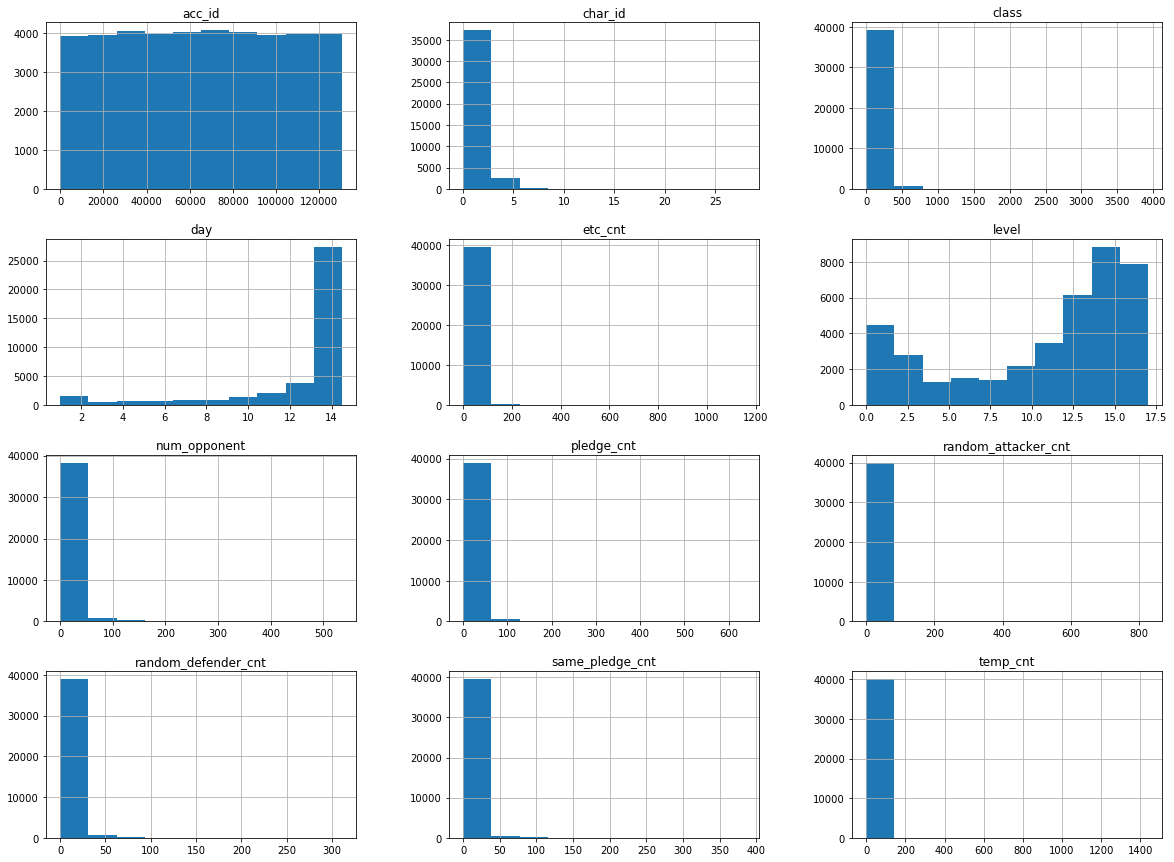

In [289]:
train_combat_byacc.hist(figsize=(20,15))

In [290]:
train_combat_byacc.columns

Index(['acc_id', 'day', 'class', 'level', 'pledge_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'temp_cnt', 'same_pledge_cnt', 'etc_cnt',
       'num_opponent', 'char_id'],
      dtype='object')

In [292]:
import math
from sklearn import preprocessing
def log_data():
    # 변수의 범위를 좁히기 위해 로그 변환
    train_combat_byacc['log_etc_cnt']=  preprocessing.scale(np.log(train_combat_byacc['etc_cnt']+1)) # 로그
    train_combat_byacc['log_num_opponent']=  preprocessing.scale(np.log(train_combat_byacc['num_opponent']+1)) # 로그
    train_combat_byacc['log_pledge_cnt']=  preprocessing.scale(np.log(train_combat_byacc['pledge_cnt']+1)) # 로그
    train_combat_byacc['log_random_attacker_cnt']=  preprocessing.scale(np.log(train_combat_byacc['random_attacker_cnt']+1)) # 로그
    train_combat_byacc['log_random_defender_cnt']=  preprocessing.scale(np.log(train_combat_byacc['random_defender_cnt']+1)) # 로그
    train_combat_byacc['log_temp_cnt']=  preprocessing.scale(np.log(train_combat_byacc['temp_cnt']+1)) # 로그
    train_combat_byacc['log_same_pledge_cnt']=  preprocessing.scale(np.log(train_combat_byacc['same_pledge_cnt']+1)) # 로그
    train_combat_byacc = train_combat_byacc.drop(['etc_cnt', 'num_opponent', 'pledge_cnt', 'random_attacker_cnt',
                                             'random_defender_cnt', 'temp_cnt', 'same_pledge_cnt'] ,axis=1)
    return train_combat_byacc

In [328]:
# 헤비 값 제거
combat_light = train_combat_byacc[(train_combat_byacc['etc_cnt']<=25) & (train_combat_byacc['num_opponent']<=12) 
                                  &(train_combat_byacc['pledge_cnt']<=10) &(train_combat_byacc['random_attacker_cnt']<=25) 
                                  &(train_combat_byacc['random_defender_cnt']<=20) &(train_combat_byacc['same_pledge_cnt']<=25) 
                                  &(train_combat_byacc['temp_cnt']<=25) ]
# 8892명 제거

In [329]:
combat_light
# 8892명 제거

,acc_id,day,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,char_id
0,2,14.500000,28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,5,7.785714,36,4.071429,0.000000,0.000000,0.000000,0.479728,0.000000,0.000000,0.098129,0.642857
2,8,14.500000,485,14.621684,0.128368,4.270875,1.183064,3.837822,0.000000,0.900892,3.041991,4.750000
3,17,14.500000,34,13.857143,0.000000,0.000000,2.366129,3.358094,12.398273,0.675669,1.373803,1.857143
4,20,13.821429,158,16.000000,1.283685,0.000000,1.183064,0.479728,0.000000,16.441283,10.107262,1.357143
5,21,13.500000,1,13.928571,0.000000,0.000000,0.000000,2.878367,0.000000,0.225223,0.785030,1.000000
7,38,13.892857,216,13.044643,0.000000,0.000000,2.366129,8.635100,0.000000,2.252231,3.434506,3.214286
8,41,1.000000,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714
9,43,13.857143,167,15.214286,0.000000,0.000000,1.183064,0.959456,0.000000,0.000000,0.294386,1.000000
10,50,14.107143,182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928571


In [330]:
# 레이블 데이터 추가
train_label = pd.read_csv('./train_label_add.csv')
train = pd.merge(combat_light, train_label, on = 'acc_id')

train = train.drop('Unnamed: 0', axis=1)

# 이탈자 분류를 위한 샘플링
from sklearn.model_selection import train_test_split
data = train.drop(['acc_id','amount_spent','survival_time','total_spent'],axis=1)
train_set = data.drop('secession', axis=1)
target = data['secession']
train_x, test_x, train_y, test_y = train_test_split(train_set,target,test_size=0.3, random_state=0 )

In [331]:
corr_matrix= train.corr()
corr_matrix['secession'].sort_values(ascending=False)
# 로그 변환 후 과금과의 상관관계는 많이 오름
# 이탈여부는 좀 상관관계는 올랐는데 성능은 떨어짐

secession              1.000000
amount_spent           0.074465
etc_cnt                0.027782
random_defender_cnt    0.017855
num_opponent           0.008203
acc_id                 0.001447
same_pledge_cnt       -0.010376
random_attacker_cnt   -0.010410
pledge_cnt            -0.012955
level                 -0.071789
temp_cnt              -0.079182
class                 -0.147424
total_spent           -0.209969
char_id               -0.210492
day                   -0.385533
survival_time         -0.870415
Name: secession, dtype: float64

In [332]:
corr_matrix= train.corr()
corr_matrix['survival_time'].sort_values(ascending=False)

survival_time          1.000000
day                    0.486260
char_id                0.262382
total_spent            0.233509
class                  0.187199
level                  0.162181
temp_cnt               0.120569
num_opponent           0.036272
same_pledge_cnt        0.033166
pledge_cnt             0.028207
random_attacker_cnt    0.024591
etc_cnt                0.006740
random_defender_cnt    0.000034
acc_id                -0.000781
amount_spent          -0.121710
secession             -0.870415
Name: survival_time, dtype: float64

In [333]:
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x,train_y)
y_pred = rnd_clf.predict(test_x)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))
# 결과 : 전체
# RandomForestClassifier 0.7288333333333333
# RandomForestClassifier 0.684016313847349

# 결과 light 유저  - 효과 없음
# RandomForestClassifier 0.7188471016822029
# RandomForestClassifier 0.6855225311601151

RandomForestClassifier 0.7188471016822029
RandomForestClassifier 0.6855225311601151


X_train.shape : (28000, 11)
X_train_l1.shape : (28000, 6)
[ True  True  True  True  True  True False False False False False]


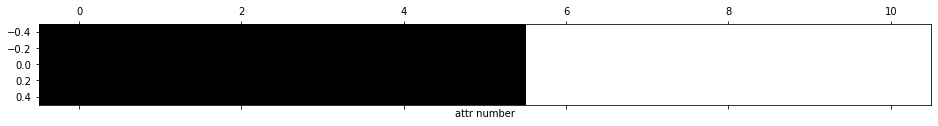

In [316]:
# feature engineering

from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=700, random_state=42), threshold="median")
select.fit(train_x,train_y)

train_x_l1 = select.transform(train_x)
test_x_l1 = select.transform(test_x)

print("X_train.shape : {}".format(train_x.shape))
print("X_train_l1.shape : {}".format(train_x_l1.shape))
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

In [317]:
rnd_clf = RandomForestClassifier(n_estimators=700,random_state=42)
rnd_clf.fit(train_x_l1,train_y)
y_pred = rnd_clf.predict(test_x_l1)
print(rnd_clf.__class__.__name__, accuracy_score(test_y, y_pred))
print(rnd_clf.__class__.__name__, f1_score(test_y, y_pred))

#결과 전체 mean
# RandomForestClassifier 0.7136666666666667
# RandomForestClassifier 0.6696789079023265
# mean 1.25
# RandomForestClassifier 0.7045
# RandomForestClassifier 0.6595622119815668

# mean 0.75
# RandomForestClassifier 0.7215
# RandomForestClassifier 0.6752186588921283

# mean 0.6 8개 컬럼
# RandomForestClassifier 0.72775
# RandomForestClassifier 0.6839508561478185

# mean 0.5 9개 컬럼
# RandomForestClassifier 0.72775
# RandomForestClassifier 0.6839508561478185

# median 
# RandomForestClassifier 0.7199166666666666
# RandomForestClassifier 0.6756104623105879


RandomForestClassifier 0.7199166666666666
RandomForestClassifier 0.6756104623105879
